In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Genre Breakdown

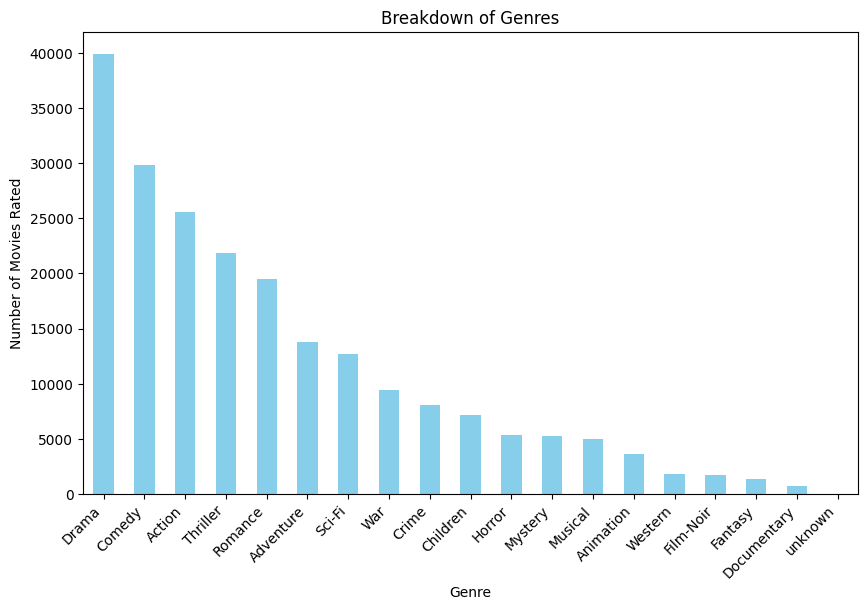

In [5]:
df = pd.read_csv("./data/movie_ratings.csv")

df_exploded = df.assign(genres=df['genres'].str.split('|').explode('genres'))
genre_counts = df_exploded['genres'].value_counts()

plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Breakdown of Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies Rated")
plt.xticks(rotation=45, ha="right")
plt.show()


Highest Views by Genre

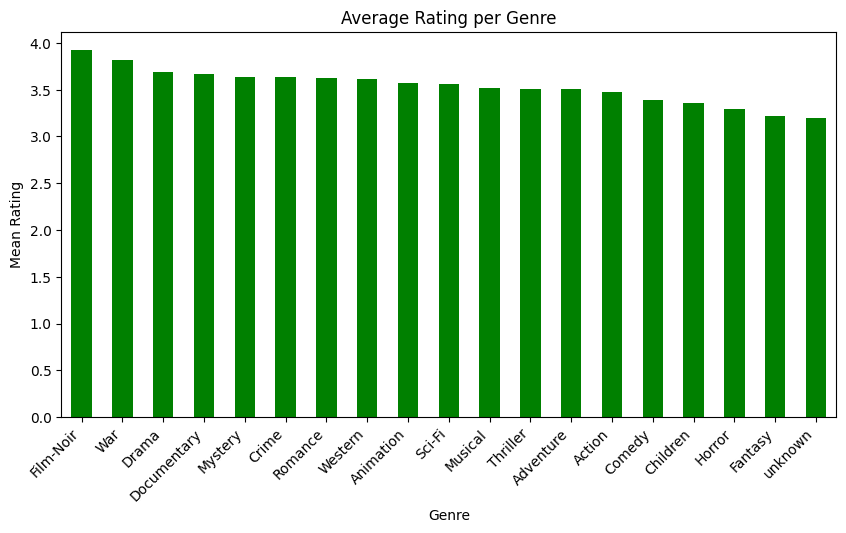

In [11]:
genre_mean_ratings = df_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_mean_ratings.plot(kind='bar', color='green')
plt.title("Average Rating per Genre")
plt.xlabel("Genre")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

Mean Rating

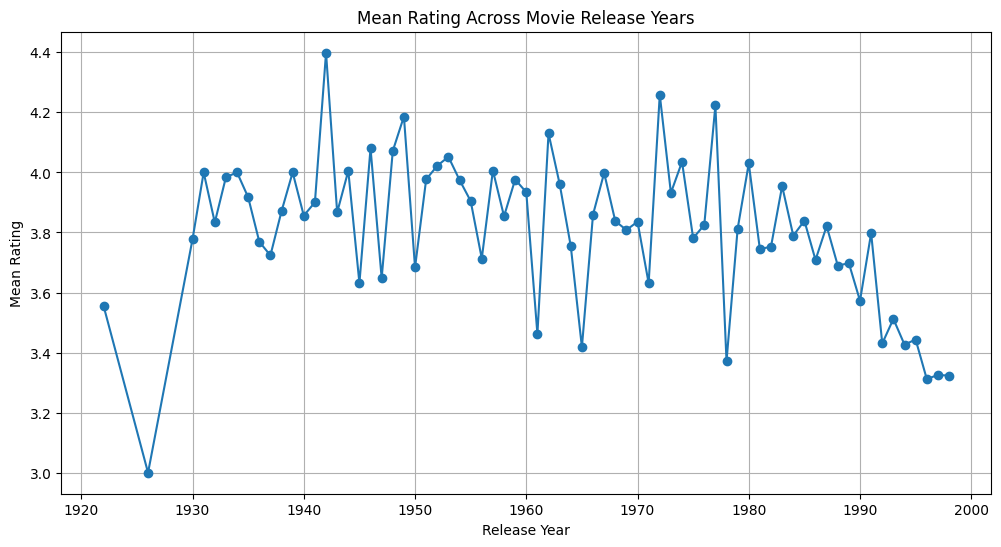

In [12]:
yearly_mean = df.groupby('year')['rating'].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly_mean.index, yearly_mean.values, marker='o')
plt.title("Mean Rating Across Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Mean Rating")
plt.grid(True)
plt.show()

Top 5 Rated Movies

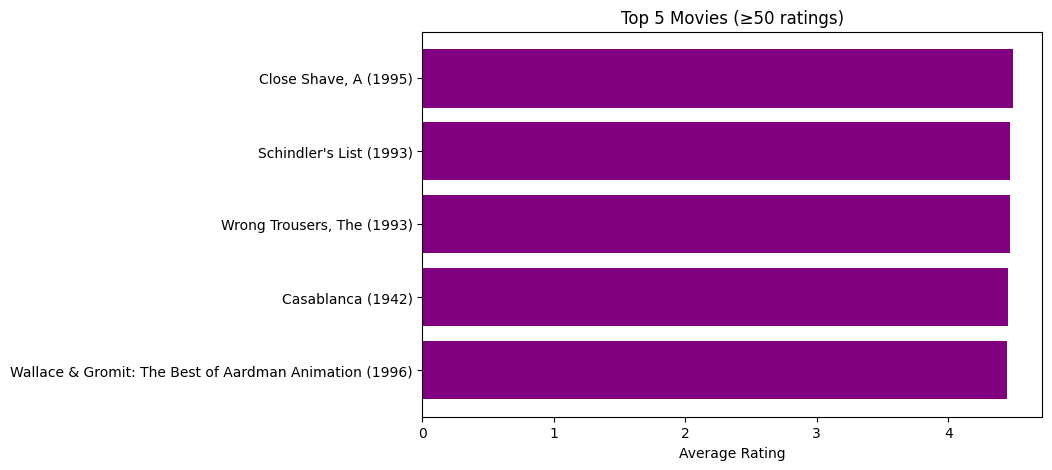

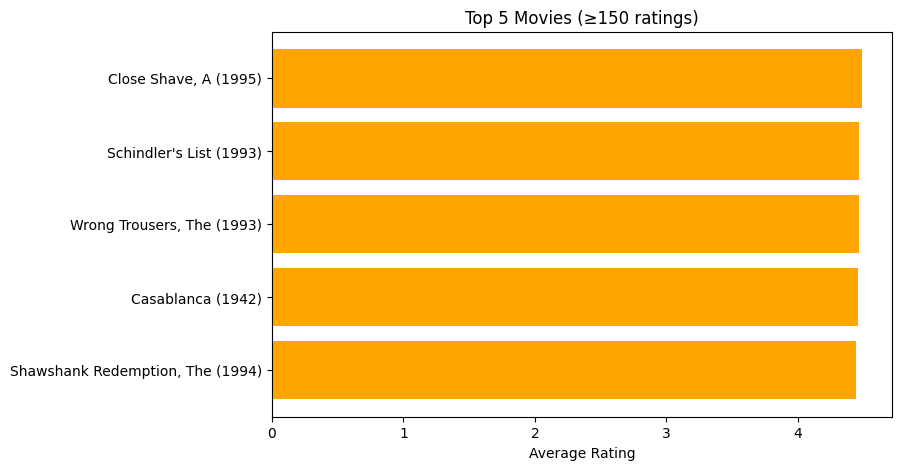

In [13]:
movie_stats = df.groupby('title').agg(
    mean_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
)

top50 = movie_stats[movie_stats['num_ratings'] >= 50].sort_values('mean_rating', ascending=False).head(5)

top150 = movie_stats[movie_stats['num_ratings'] >= 150].sort_values('mean_rating', ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.barh(top50.index, top50['mean_rating'], color='purple')
plt.title("Top 5 Movies (≥50 ratings)")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8,5))
plt.barh(top150.index, top150['mean_rating'], color='orange')
plt.title("Top 5 Movies (≥150 ratings)")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()
